--- Head of the New DataFrame with Principal Components ---
        PC1        PC2       PC3       PC4       PC5  target
0  9.192837   1.948583 -1.123166 -3.633731  1.195110       0
1  2.387802  -3.768172 -0.529293 -1.118264 -0.621775       0
2  5.733896  -1.075174 -0.551748 -0.912083  0.177086       0
3  7.122953  10.275589 -3.232790 -0.152547  2.960878       0
4  3.935302  -1.948072  1.389767 -2.940639 -0.546747       0


--- Explained Variance by Each Component ---
PC1: 44.27%
PC2: 18.97%
PC3: 9.39%
PC4: 6.60%
PC5: 5.50%

Total Explained Variance by 5 components: 84.73%




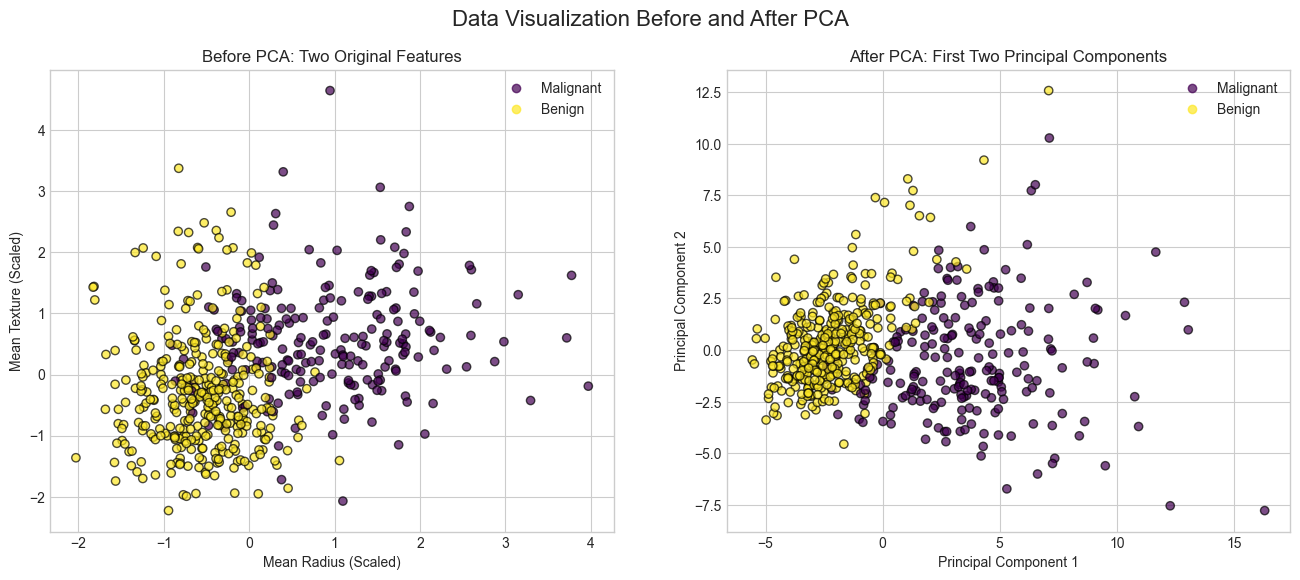

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- 1. Load and Scale the Data ---
# As before, we start by loading the data and scaling it. This is a crucial
# prerequisite for an effective PCA.
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Apply the Final PCA Transformation ---
# Based on our parallel analysis, we decided to retain 5 components.
# We now initialize PCA with n_components=5 and transform our scaled data.
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# --- 3. Create a New DataFrame with Principal Components ---
# For easier analysis, we'll create a new DataFrame containing the results.
# The columns are the new principal components (PC1, PC2, etc.).
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)

# We can also add the original target variable to this new DataFrame
# to see how the components relate to the diagnosis (0: Malignant, 1: Benign).
pca_df['target'] = y

print("--- Head of the New DataFrame with Principal Components ---")
print(pca_df.head())
print("\n")

# --- 4. Explained Variance ---
# It's useful to see how much of the total variance is captured by our
# selected components.
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance_ratio)

print(f"--- Explained Variance by Each Component ---")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.2%}")

print(f"\nTotal Explained Variance by {n_components} components: {total_explained_variance:.2%}")
print("\n")

# --- 5. Before-and-After Visualization ---
# This visualization shows the power of PCA. We plot the data using two of the
# original features and then plot it again using the first two principal components.
# The goal is to see if the principal components provide a better separation
# between the malignant (0) and benign (1) classes.

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before PCA: Plot using two original scaled features
scatter1 = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
ax1.set_title('Before PCA: Two Original Features')
ax1.set_xlabel('Mean Radius (Scaled)')
ax1.set_ylabel('Mean Texture (Scaled)')
ax1.legend(handles=scatter1.legend_elements()[0], labels=['Malignant', 'Benign'])

# After PCA: Plot using the first two principal components
scatter2 = ax2.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
ax2.set_title('After PCA: First Two Principal Components')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend(handles=scatter2.legend_elements()[0], labels=['Malignant', 'Benign'])

plt.suptitle('Data Visualization Before and After PCA', fontsize=16)
plt.show()

# --- How to Determine if PCA Was Successful ---
# 1. High Explained Variance: Capturing a high percentage (e.g., >80-95%) of the
#    variance with a much smaller number of components is a key success metric.
# 2. Improved Model Performance/Visualization: If the new components lead to a better-performing
#    machine learning model or, as seen below, a clearer separation of data points
#    in a visualization, the PCA is considered successful.

# --- When to Aim for Very High Variance (>95%) ---
# In fields where precision is critical and even small variations are important, you should
# aim for a higher captured variance. Examples include:
# - Scientific data (e.g., genomics, chemistry) where minor components might hold important discoveries.
# - Financial modeling, where small variances can have significant monetary implications.
